# PREDICTIVE MAINTENANCE IN PYTHON

## DATA MINING WATER TABLE

### Load libraries

In [1]:
# Import data manipulation libraries
import pandas as pd
import numpy as np
from datetime import datetime

#Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import data preprocessing libraries
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Import modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Import model evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
                             confusion_matrix, classification_report, precision_score, recall_score)

### Data Preparation

In [2]:
# load the values and labels for the training set
train_values = pd.read_csv("training_set_values.csv", parse_dates=["date_recorded"])
train_labels = pd.read_csv("training_set_labels.csv")

# load the values for the test set
test_values = pd.read_csv("test_set_values.csv", parse_dates=["date_recorded"])

In [3]:
# Train set values dataframe

# print the shape of the data
print(train_values.shape)

# check the first few rows of the data
train_values.head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


##### The dataframe has 40 variables and 59400 observations.

In [4]:
# Train set labels dataframe

# print the shape of the data
print(train_labels.shape)

# check the first few rows of the data
train_labels.head()

(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


##### The dataframe has 2 variables and 59400 observations.

In [5]:
# Test set values dataframe

# print the shape of the dataframe
print(test_values.shape)

# check the first few rows of the data
test_values.head()

(14850, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


##### The dataframe has 40 variables and 14850 observations.

In [6]:
# Merge the values and labels for the training set to form complete training data
train_data = pd.merge(train_values, train_labels, on="id")

# print the shape of the new dataframe
print(train_data.shape)

# check the first few rows of the dataframe
train_data.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


##### The resulting dataframe has 41 variables and 59400 observations.

In [7]:
# check the datatypes of the different columns in the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

### Data Cleaning

#### Handle Missing Values

In [8]:
# Check for missing data
train_data.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

##### There are columns with null values. This will necessitate me doing data cleaning.

#### Inspect columns with missing values

1. Funder

In [9]:
# check the top 5 unique funders
train_data["funder"].value_counts().head()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Name: funder, dtype: int64

In [10]:
# Create a function to reduce the number of unique funders for the projects
# Maintain the top 5 funders and label the rest as 'Others'

def mergeFunders(funder):
    '''
    Input:
    funder: string, funder of the project
    
    Output:
    merged_funder: string, initial funder if top 5, Other if not top 5
    '''
    
    # For the top 10 funders, maintain the funders
    if funder == 'Government Of Tanzania':
        merged_funder = 'GOT'
        
    elif funder == 'Danida':
        merged_funder = 'Danida'
        
    elif funder == 'Hesawa':
        merged_funder = 'Hesawa'
        
    elif funder == 'Rwssp':
        merged_funder = 'Rwssp'
        
    elif funder == 'World Bank':
        merged_funder = 'World Bank'
        
    # For the rest of funders, put them under the broad category 'Other'
    else:
        merged_funder = 'Other'
        
    # return the merged funder
    return merged_funder

In [11]:
# Apply the function to the 'funder' column
train_data["funder"] = train_data.funder.apply(mergeFunders)

# check the counts of the unique values again
train_data.funder.value_counts()

Other         42277
GOT            9084
Danida         3114
Hesawa         2202
Rwssp          1374
World Bank     1349
Name: funder, dtype: int64

In [12]:
# Check again for missing values
train_data.funder.isnull().sum()

0

###### We have reduced the funders to 6 wth 'Other' representing all the other funders not in the top 5 category. There are also no missing values at the moment.

2. Installer

In [13]:
# Check for the top 5 unique installers
train_data.installer.value_counts().head()

DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: installer, dtype: int64

In [14]:
# Create a function to reduce the number of installers for the projects
# Maintain the top 5 installers and label the rest as 'Other'
# Ignore the installer labelled '0'

def mergeInstallers(installer):
    '''
    Input:
    installer: string, installer of the pump
    
    Output:
    merged_installer: string, initial installer if top 5, Other if not top 5
    '''
    
    # For the top 5 installers, maintain the installers
    if installer == 'DWE':
        merged_installer = 'DWE'
        
    elif installer == 'Government':
        merged_installer = 'Government'
        
    elif installer == 'RWE':
        merged_installer = 'RWE'
        
    elif installer == 'Commu':
        merged_installer = 'Commu'
        
    elif installer == 'DANIDA':
        merged_installer = 'Danida'
                
    # For the rest of installers, put them under the broad category 'Other'
    else:
        merged_installer = 'Other'
        
    # return the merged installer
    return merged_installer

In [15]:
# Apply the function to the 'installer' column
train_data["installer"] = train_data.installer.apply(mergeInstallers)

# check the counts of the unique values again
train_data.installer.value_counts()

Other         36857
DWE           17402
Government     1825
RWE            1206
Commu          1060
Danida         1050
Name: installer, dtype: int64

In [16]:
# Check again for missing values
train_data.installer.isnull().sum()

0

3. subvillage

In [17]:
# Check the subvillages where the project have been executed
train_data.subvillage.value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64

###### There are 19287 subvillages where projects have been done. There are no dominant villages either. Therefore, creating dummy variables will result in a number of variables. The subvillage in which a project was done might not contribute significantly to the status of water pumps. We can therefore just drop the column.

In [18]:
# Drop the subvillage column
train_data.drop(columns = ["subvillage"], inplace=True)

4. Public Meeting

In [19]:
# Check for the unique public meeting
train_data.public_meeting.value_counts(normalize=True)

# These are boolean values.
# Over 90% of the pumps had a public meeting

True     0.909838
False    0.090162
Name: public_meeting, dtype: float64

In [20]:
# Fill the NAs with the mode values
train_data["public_meeting"] = train_data.public_meeting.fillna(train_data.public_meeting.mode()[0])

In [21]:
# check if there still any missing values
train_data.public_meeting.isnull().sum()

# All the missing values have been filled.

0

5. Scheme Management

In [22]:
# Check for the unique scheme managements
train_data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [23]:
# Create a function to assign projects missing management to the already existing 'Other' Category

def mergeSchemeManagement(management):
    '''
    Input:
    management: string, management of the scheme
    
    Output:
    merged_management: string, palce missing managements to the 'Other' category, maintain all others
    '''
    
    # For the managements that are not recognized, put them under the 'Other' category
    if management not in ['VWC', 'WUG', 'Water authority', 'WUA', 'Water Board', 'Parastatal', 'Private operator', 'Company']:
        merged_management = 'Other'
        
    # Maintain the rest of managements
    else:
        merged_management = management
        
    # return the merged management
    return merged_management

In [24]:
# Apply the function to the 'scheme_management' column
train_data["scheme_management"] = train_data.scheme_management.apply(mergeSchemeManagement)

# check the counts of the unique values again
train_data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Other                4813
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Name: scheme_management, dtype: int64

6. Scheme Name

In [25]:
# Check for the unique scheme names
train_data.scheme_name.value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

In [26]:
train_data.scheme_name.value_counts().head(15)

K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
I                                        229
Bagamoyo wate                            229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Name: scheme_name, dtype: int64

###### There are 2696 scheme names for the water pump projects. The naming convention is not consistent and some names are not clear, for example, names like K and M. The top scheme names are also not very dominant. We can therefore just drop this column.

In [27]:
# Drop the scheme_name column
train_data.drop(columns = ["scheme_name"], inplace=True)

7. Permit

In [28]:
# Check for the unique permits
train_data.permit.value_counts(normalize=True)

# The values are boolean.
# 68% of the projects have permits

True     0.68955
False    0.31045
Name: permit, dtype: float64

In [29]:
# Impute the missing values with the mode
train_data["permit"] = train_data.permit.fillna(train_data.permit.mode()[0])

In [30]:
# check for missing values
train_data.permit.isnull().sum()

0

In [31]:
# Check again for missing values in the whole data

In [32]:
train_data.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

###### All the missing values have been handled.

#### Inspect data types

In [33]:
# Inspect the data types of the columns
train_data.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                     bool
recorded_by                      object
scheme_management                object
permit                             bool
construction_year                 int64
extraction_type                  object
extraction_type_group            object
extraction_type_class            object


###### Inspect columns with "object" data type

In [34]:
# Inspect columns with 'object' data type
object_columns = train_data.select_dtypes(include = ['object'])
object_columns.apply(lambda x: len(x.unique()))

funder                       6
installer                    6
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
recorded_by                  1
scheme_management            9
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

###### We need to inspect these variables one by one, and check if we need to merge some of their values or even drop a value that is not important.

1. wpt_name

In [35]:
# check the distribution of unique waterpoint names
train_data.wpt_name.value_counts()

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

###### There are very waterpoints names with no dominant ones. As a result, we can just drop this column.

In [36]:
# Drop the wpt_name column
train_data.drop(columns = ["wpt_name"], inplace=True)

2. basin

In [37]:
train_data.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [38]:
# check the distribution of the status groups across the basins
basin_status_pivot_table = pd.pivot_table(train_data, index=['basin', 'status_group'],
                           values=['id'], aggfunc='count')
basin_status_pivot_table

id
basin                   status_group                 
Internal                functional               4482
                        functional needs repair   557
                        non functional           2746
Lake Nyasa              functional               3324
                        functional needs repair   250
                        non functional           1511
Lake Rukwa              functional               1000
                        functional needs repair   270
                        non functional           1184
Lake Tanganyika         functional               3107
                        functional needs repair   742
                        non functional           2583
Lake Victoria           functional               5100
                        functional needs repair   989
                        non functional           4159
Pangani                 functional               5372
                        functional needs repair   477
                        non functional           3091
Rufiji                  functional               5068
                        functional needs repair   437
                        non functional           2471
Ruvuma / Southern Coast functional               1670
                        functional needs repair   326
                        non functional           2497
Wami / Ruvu             functional               3136
                        functional needs repair   269
                        non functional           2582

###### Most of the basins have more functional pumps than non-functional ones. There seems to be a good distribution of these. Moreover, all the basins have a significant number of projects associated with them. We can therefore keep this column.

3. region

In [39]:
# check the counts of the unique values
train_data.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [40]:
# Create a function to reduce the number of regions where the projects have been done
# Maintain the top 5 regions and label the rest as 'Other'

def mergeRegion(region):
    '''
    Input:
    region: string, region of the pump
    
    Output:
    merged_region: string, initial region if top 5, Other if not top 5 dominant
    '''
    
    # For the top 5 regions, maintain the regions
    if region == 'Iringa':
        merged_region = 'iringa'
        
    elif region == 'Shinyanga':
        merged_region = 'shinyanga'
        
    elif region == 'Mbeya':
        merged_region = 'mbeya'
        
    elif region == 'Kilimanjaro':
        merged_region = 'kilimanjaro'
        
    elif region == 'Morogoro':
        merged_region = 'morogoro'
                
    # For the rest of regions, put them under the broad category 'Other'
    else:
        merged_region = 'Other'
        
    # return the merged region
    return merged_region

In [41]:
# Apply the function to the 'region' column
train_data["region"] = train_data.region.apply(mergeRegion)

# check the counts of the unique values again
train_data.region.value_counts()

Other          36100
iringa          5294
shinyanga       4982
mbeya           4639
kilimanjaro     4379
morogoro        4006
Name: region, dtype: int64

###### There following columns: `region`, `lga`, and `ward` all represent geographical information where the projects were done. They could be correlated with each other. Therefore, we need to keep `region` and drop both `lga` and `ward`.

In [42]:
# drop the other two geographical information
train_data.drop(columns=["lga", "ward"], inplace=True)

4. recorded_by

In [43]:
# get the value counts
train_data.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

###### All the values were recorded by `GeoData Consultants Ltd`. This column is therefore not important in predicting the status of the pumps.

In [44]:
# Drop the column
train_data.drop(columns=["recorded_by"], inplace=True)

5. extraction_type      
`extraction_type`, `extraction_type_group`, and `extraction_type_class` seem related.

In [45]:
train_data[["extraction_type", "extraction_type_group", "extraction_type_class"]]

# They all have the same values. I will therefore drop "extraction_type_group" and "extraction_type_class".

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,swn 80,handpump
59398,nira/tanira,nira/tanira,handpump


In [46]:
# Drop 2 of the columns
train_data.drop(columns=["extraction_type_group", "extraction_type_class"], inplace=True)

In [47]:
# check value counts of "extraction_type" column
train_data.extraction_type.value_counts()

# There is need to reduce the number of unique values

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [48]:
# Create a function to reduce the number of extraction types
# Maintain the top 3 extraction types and label the rest as 'Other'

def mergeExtraction(extraction):
    '''
    Input:
    extraction: string, extraction type of the project
    
    Output:
    merged_extraction: string, initial extraction if top 3, Other if not top 3 dominant
    '''
    
    # For the top 3 extraction types, maintain the type
    if extraction == 'gravity':
        merged_extraction = 'gravity'
        
    elif extraction == 'nira/tanira':
        merged_extraction = 'nira/tanira'
        
    elif extraction == 'submersible':
        merged_extraction = 'submersible'
                
    # For the rest of extraction types, put them under the broad category 'Other'
    else:
        merged_extraction = 'Other'
        
    # return the merged extraction type
    return merged_extraction

In [49]:
# Apply the function to the 'extraction_type' column
train_data["extraction_type"] = train_data.extraction_type.apply(mergeExtraction)

# check the counts of the unique values again
train_data.extraction_type.value_counts()

gravity        26780
Other          19702
nira/tanira     8154
submersible     4764
Name: extraction_type, dtype: int64

6. Management     
`management` and `management_group` seem related.

In [50]:
# check the values of the two columns
train_data[["scheme_management", "management", "management_group"]]

# "management" is almost similar to "scheme_management" with "management_group" showing the broader category for the management.

,scheme_management,management,management_group
0,VWC,vwc,user-group
1,Other,wug,user-group
2,VWC,vwc,user-group
3,VWC,vwc,user-group
4,Other,other,other
...,...,...,...
59395,Water Board,water board,user-group
59396,VWC,vwc,user-group
59397,VWC,vwc,user-group
59398,VWC,vwc,user-group


In [51]:
# check the groups for amanagement
train_data.management_group.value_counts()

# These doesn't provide us with any new infromation and can just drop the column.

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [52]:
# Drop "management" and "management_group" columns
train_data.drop(columns=["management", "management_group"], inplace=True)

7. payment and payment_type

In [53]:
# check the values of the columns
train_data[["payment", "payment_type"]]

# The two columns contain the same information. We need to drop one of the columns

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


In [54]:
# check unique values of the payment column
train_data.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [55]:
# Drop "payment_type" column
train_data.drop(columns=["payment_type"], inplace=True)

8. water_quality and quality_group

In [56]:
# check the values of the two columns
train_data[["water_quality", "quality_group"]]

# These values seem to represent the same things (similar).

,water_quality,quality_group
0,soft,good
1,soft,good
2,soft,good
3,soft,good
4,soft,good
...,...,...
59395,soft,good
59396,soft,good
59397,fluoride,fluoride
59398,soft,good


In [57]:
# check distribution of unique values in the water_quality column
train_data.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [58]:
# drop the quality_group column
train_data.drop(columns=["quality_group"], inplace=True)

9. quantity and quantity_group

In [59]:
# check the values of these two columns
train_data[["quantity", "quantity_group"]]

# The values in the two columns are very identical. We therefore need to drop one of the columns.

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


In [60]:
# Drop the quantity_group column
train_data.drop(columns=["quantity_group"], inplace=True)

10. source, source_type, and source_class

In [61]:
# check the values
train_data[["source", "source_type", "source_class"]]

# "source" and "source_type" columns almost have all values similar. "source_class" column tells us the class of the source, therefore does not present very new information but is important. We can drop the "source_type" column.

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
59395,spring,spring,groundwater
59396,river,river/lake,surface
59397,machine dbh,borehole,groundwater
59398,shallow well,shallow well,groundwater


In [62]:
# check distribution of unique values
train_data.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [63]:
# check distribution of unique values for source_class
train_data.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [64]:
# drop "source_type" column
train_data.drop(columns=["source_type"], inplace=True)

11. waterpoint_type and waterpoint_type_group

In [65]:
# check the values
train_data[["waterpoint_type", "waterpoint_type_group"]]

# These two columns contains similar information. I need to drop one of them

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


In [66]:
# check the value count of the waterpoint types
train_data.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [67]:
# drop one of the columns
train_data.drop(columns=["waterpoint_type_group"], inplace=True)

12. status_group

In [68]:
# check the values
train_data.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

###### Inspect other columns

In [69]:
# Inspect the column with other data types apart from 'object'
other_columns = train_data.select_dtypes(exclude = ['object'])
other_columns.apply(lambda x: len(x.unique()))

id                   59400
amount_tsh              98
date_recorded          356
gps_height            2428
longitude            57516
latitude             57517
num_private             65
region_code             27
district_code           20
population            1049
public_meeting           2
permit                   2
construction_year       55
dtype: int64

In [70]:
# check their data types
other_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 59400 non-null  int64         
 1   amount_tsh         59400 non-null  float64       
 2   date_recorded      59400 non-null  datetime64[ns]
 3   gps_height         59400 non-null  int64         
 4   longitude          59400 non-null  float64       
 5   latitude           59400 non-null  float64       
 6   num_private        59400 non-null  int64         
 7   region_code        59400 non-null  int64         
 8   district_code      59400 non-null  int64         
 9   population         59400 non-null  int64         
 10  public_meeting     59400 non-null  bool          
 11  permit             59400 non-null  bool          
 12  construction_year  59400 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(3), int64(7)
memory us

In [71]:
# inspect the columns with geographical information above
train_data[["gps_height", "latitude", "longitude", "region_code", "district_code"]].head()

# The information represented by these columns may as well have been captured by other columns like "region".
# I will therefore drop them.

,gps_height,latitude,longitude,region_code,district_code
0,1390,-9.856322,34.938093,11,5
1,1399,-2.147466,34.698766,20,2
2,686,-3.821329,37.460664,21,4
3,263,-11.155298,38.486161,90,63
4,0,-1.825359,31.130847,18,1


In [72]:
# inspect the "num_private" column
train_data.num_private.value_counts()

# It is not clear what this column represents.

0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: num_private, Length: 65, dtype: int64

In [73]:
# inspect the "amount_tsh" column
train_data.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [74]:
# Drop the unnecessary columns identified above
# Additionally, drop the "id" column as it is just a unique identifier for the records
train_data.drop(columns=["gps_height", "latitude", "longitude", "region_code", "district_code", "num_private", "id"], inplace=True)

date_recorded    
Convert this column to datetime. We can then create a new column `days_elapsed` to represent the number of days that have elapsed since the date the data for that project was recorded and the date of the most recent recorded project. This variable might be well correlated to the status of the pumps.

In [75]:
# check the values of the date_recorded column
train_data.date_recorded

0       2011-03-14
1       2013-03-06
2       2013-02-25
3       2013-01-28
4       2011-07-13
           ...    
59395   2013-05-03
59396   2011-05-07
59397   2011-04-11
59398   2011-03-08
59399   2011-03-23
Name: date_recorded, Length: 59400, dtype: datetime64[ns]

In [76]:
# convert the column to datetime
train_data.date_recorded = pd.to_datetime(train_data.date_recorded)

In [77]:
# get general description of this column
train_data.date_recorded.describe(datetime_is_numeric=True)

# The last date is 03-12-2013. We will subtract all the dates from this

count                            59400
mean     2012-03-29 09:11:33.818181888
min                2002-10-14 00:00:00
25%                2011-04-01 00:00:00
50%                2012-10-10 00:00:00
75%                2013-02-09 00:00:00
max                2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [78]:
# Create a new column for days elapsed
train_data["days_elapsed"] =  train_data.date_recorded.map(lambda x: (datetime(2013, 12, 3) - x).days)

In [79]:
# check the data
train_data.days_elapsed.dtype

dtype('int64')

In [80]:
# drop the date_recorded column
train_data.drop(columns=["date_recorded"], inplace=True)

In [81]:
# inspect "construction_year" column
train_data.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [82]:
# Create a function to group the years into decades

def constructionYearMerger(year):
    '''
    Input:
    year: int, year of construction
    
    Output:
    decade: string, last digits of the decade
    '''
    if year >= 1960 and year < 1970:
        return '60s'
    elif year >= 1970 and year < 1980:
        return '70s'
    elif year >= 1980 and year < 1990:
        return '80s'
    elif year >= 1990 and year < 2000:
        return '90s'
    elif year >= 2000 and year < 2010:
        return '00s'
    elif year >= 2010:
        return '10s'
    else:
        return 'unknown'

In [83]:
# apply the function to the construction_year column
train_data["construction_year"] = train_data.construction_year.apply(constructionYearMerger)

# check the value counts
train_data.construction_year.value_counts()

unknown    20709
00s        15330
90s         7678
80s         5578
10s         5161
70s         4406
60s          538
Name: construction_year, dtype: int64

###### Inspect all the remaining columns

In [84]:
# inspect all columns
train_data.apply(lambda x: len(x.unique()))

amount_tsh             98
funder                  6
installer               6
basin                   9
region                  6
population           1049
public_meeting          2
scheme_management       9
permit                  2
construction_year       7
extraction_type         4
payment                 7
water_quality           8
quantity                5
source                 10
source_class            3
waterpoint_type         7
status_group            3
days_elapsed          356
dtype: int64

In [85]:
# check data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   funder             59400 non-null  object 
 2   installer          59400 non-null  object 
 3   basin              59400 non-null  object 
 4   region             59400 non-null  object 
 5   population         59400 non-null  int64  
 6   public_meeting     59400 non-null  bool   
 7   scheme_management  59400 non-null  object 
 8   permit             59400 non-null  bool   
 9   construction_year  59400 non-null  object 
 10  extraction_type    59400 non-null  object 
 11  payment            59400 non-null  object 
 12  water_quality      59400 non-null  object 
 13  quantity           59400 non-null  object 
 14  source             59400 non-null  object 
 15  source_class       59400 non-null  object 
 16  waterpoint_type    594

### Exploratory Data Analysis

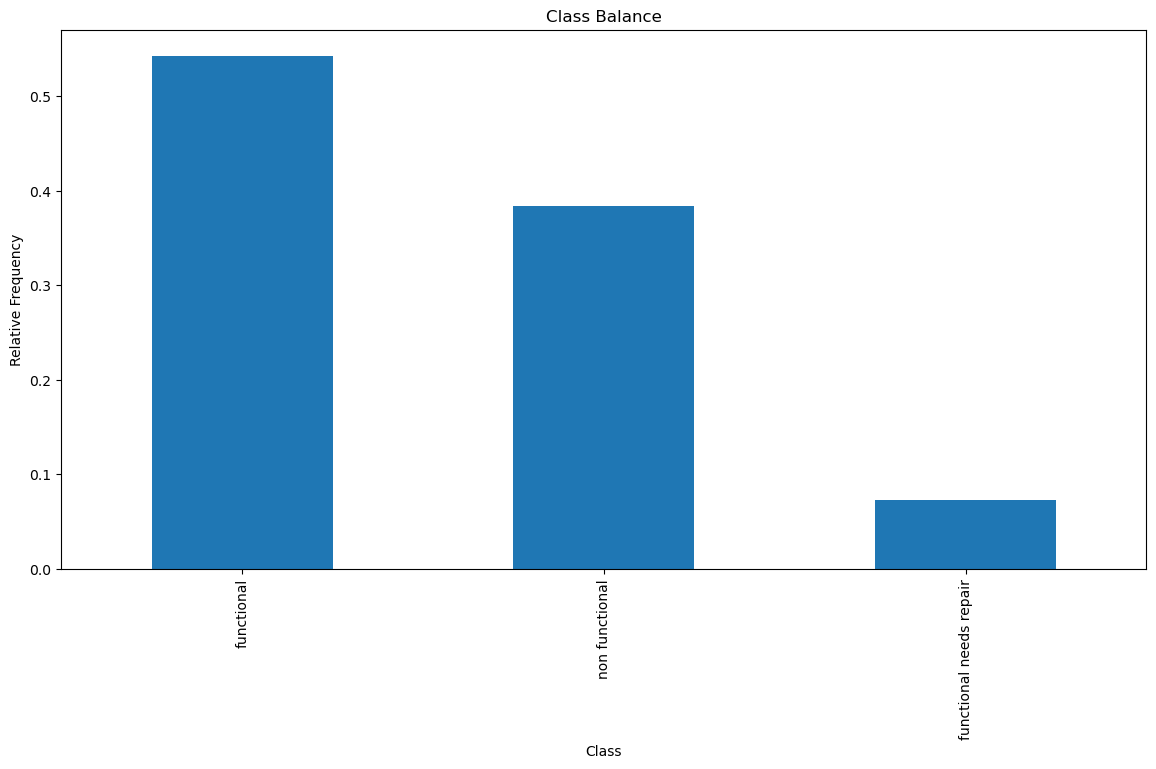

In [86]:
#A bar chart of the value counts of status groups of pumps
# Plot value counts of `"status_group"`
fig, ax = plt.subplots(figsize=(14, 7))
train_data["status_group"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

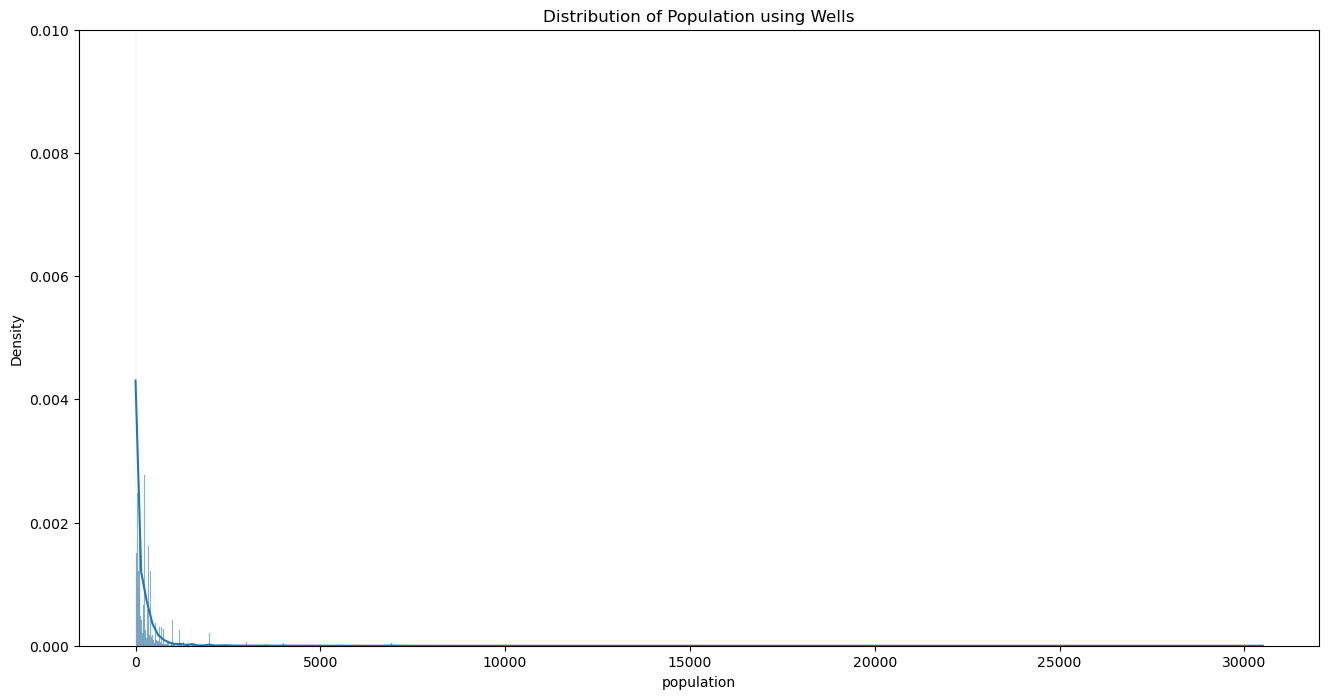

In [87]:
# Plot a distribution plot for the population using the different wells
fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(train_data.population, stat="density", kde=True, ax=ax)
plt.ylim(0, 0.01) # restrict y limit

# add title labels
plt.title("Distribution of Population using Wells");

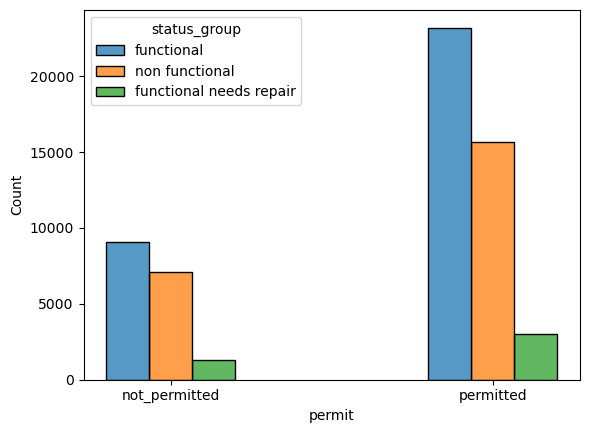

In [88]:
# bar plot of permit
# Check the functionality of pumpsa ccording to whether they had permits or not
fig, ax = plt.subplots()

# replace boolean with string
train_data['permit'] = train_data['permit'].replace({True: "permitted", False: "not_permitted"})

# plot a histplot
sns.histplot(x='permit', hue='status_group', data=train_data, multiple="dodge", ax = ax, shrink=.4)

plt.show();

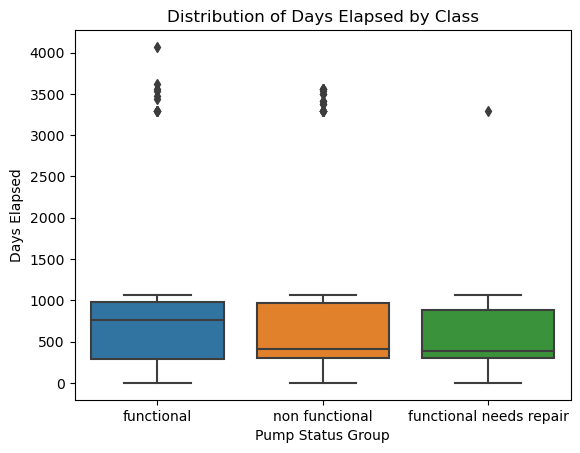

In [89]:
# Create boxplot to show the distributions of days elapsed from most recent date for the groups in the "status_group" column
fig, ax = plt.subplots()

sns.boxplot(x="status_group", y="days_elapsed", data=train_data, ax=ax)
# Label axes
plt.xlabel("Pump Status Group")
plt.ylabel("Days Elapsed")
plt.title("Distribution of Days Elapsed by Class")

plt.show();

#### Correlation Matrix

In [90]:
# Find the correlation matrix of the dataset
train_data.corr()

,amount_tsh,population,public_meeting,days_elapsed
amount_tsh,1.000000,0.016288,0.015798,0.014629
population,0.016288,1.000000,0.006575,-0.099737
public_meeting,0.015798,0.006575,1.000000,0.025712
days_elapsed,0.014629,-0.099737,0.025712,1.000000


### Label Encoding

In [91]:
# select the categorical columns
categorical_cols = [colname for colname in train_data.columns if train_data[colname].dtype == "object"]

categorical_cols = categorical_cols[:-1]
categorical_cols

['funder',
 'installer',
 'basin',
 'region',
 'scheme_management',
 'permit',
 'construction_year',
 'extraction_type',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type']

In [92]:
# Encode the labels of the above categorical variables
train_data[categorical_cols] = train_data[categorical_cols].apply(LabelEncoder().fit_transform)

In [93]:
# Encode the two boolean columns, "permit" and "public_meeting"
train_data['public_meeting'] = train_data['public_meeting'].replace({True: 1, False: 0})
train_data['permit'] = train_data['permit'].replace({"permitted": 1, "not_permitted": 0})

In [94]:
# Manually encode the target variable

# map out the current groups to their respective values
map_status_group = {
    "functional": 2,
    "functional needs repair": 1,
    "non functional": 0
}

# apply the map to the status_group column
train_data["status_group"] = train_data["status_group"].map(map_status_group)

# check the encoded values
train_data.status_group.value_counts()

2    32259
0    22824
1     4317
Name: status_group, dtype: int64

In [95]:
# Check the top 10 rows of the encoded data
train_data.head(10)

,amount_tsh,funder,installer,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group,days_elapsed
0,6000.0,3,4,1,1,109,1,4,0,5,1,2,6,1,8,0,1,2,995
1,0.0,3,4,4,0,280,1,1,1,1,1,0,6,2,5,1,1,2,272
2,25.0,3,4,5,0,250,1,4,1,0,1,4,6,1,0,1,2,2,281
3,0.0,3,4,7,0,58,1,4,1,4,3,0,6,0,3,0,2,0,309
4,0.0,3,4,4,0,0,1,1,1,6,1,0,6,3,5,1,1,2,874
5,20.0,3,1,5,0,1,1,4,1,0,3,4,4,1,4,2,2,2,996
6,0.0,3,4,0,5,0,1,4,1,6,0,0,6,1,3,0,4,0,428
7,0.0,4,1,3,5,0,1,1,1,6,2,6,3,1,7,0,4,0,420
8,0.0,3,4,3,0,0,1,4,1,6,0,0,4,3,3,0,4,0,395
9,0.0,3,4,4,0,0,1,1,1,6,2,0,6,1,7,0,4,2,853


In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   funder             59400 non-null  int32  
 2   installer          59400 non-null  int32  
 3   basin              59400 non-null  int32  
 4   region             59400 non-null  int32  
 5   population         59400 non-null  int64  
 6   public_meeting     59400 non-null  int64  
 7   scheme_management  59400 non-null  int32  
 8   permit             59400 non-null  int32  
 9   construction_year  59400 non-null  int32  
 10  extraction_type    59400 non-null  int32  
 11  payment            59400 non-null  int32  
 12  water_quality      59400 non-null  int32  
 13  quantity           59400 non-null  int32  
 14  source             59400 non-null  int32  
 15  source_class       59400 non-null  int32  
 16  waterpoint_type    594

##### There is no strong correlation between the independent features.

### Data Preparation for the Test Set

##### Handling missing values 

In [97]:
# check for missing values
test_values.apply(lambda x: sum(x.isnull()))

# apply 'mergeFunder' function to the funder column
test_values["funder"] = test_values.funder.apply(mergeFunders)

# Apply the 'mergeInstaller' function to the 'installer' column
test_values["installer"] = test_values.installer.apply(mergeInstallers)

# Ignore the missing values in the 'subvillage' column because it will be dropped.

# Fill the NAs on the 'public_meeting' column with the mode value
test_values["public_meeting"] = test_values.public_meeting.fillna(test_values.public_meeting.mode()[0])

# Apply the 'mergeSchemeManagement' function to the 'scheme_management' column
test_values["scheme_management"] = test_values.scheme_management.apply(mergeSchemeManagement)

# Ignore the scheme name column because it will be dropped

# Impute the missing values with the mode
test_values["permit"] = test_values.permit.fillna(test_values.permit.mode()[0])

# check again for missing values in the data
test_values.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting              0
recorded_by                 0
scheme_management           0
scheme_name              7092
permit                      0
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

##### Handle data types and merging values

In [98]:
# Apply the 'mergeRegion' function to the 'region' column
test_values["region"] = test_values.region.apply(mergeRegion)

# Apply the 'mergeExtraction' function to the 'extraction_type' column
test_values["extraction_type"] = test_values.extraction_type.apply(mergeExtraction)

# create a new column 'days_elapsed' to represent the number of days that have elapsed since the date 
# the data for that project was recorded and the date of the most recent recorded project.
test_values.date_recorded = pd.to_datetime(test_values.date_recorded)
test_values["days_elapsed"] =  test_values.date_recorded.map(lambda x: (datetime(2013, 12, 3) - x).days)

# apply the 'constructonYearMerger' function to the construction_year column
test_values["construction_year"] = test_values.construction_year.apply(constructionYearMerger)

##### Drop unnecessary columns

In [99]:
# drop the unnecessary columns that were dropped in the training set
cols_to_drop = ["id", "date_recorded", "gps_height", "longitude", "latitude", "wpt_name", "num_private", "subvillage", "region_code",
               "district_code", "lga", "ward", "recorded_by", "scheme_name", "extraction_type_group", "extraction_type_class", 
               "management", "management_group", "payment_type", "quality_group", "quantity_group", "source_type", "waterpoint_type_group"]
test_values.drop(columns=cols_to_drop, inplace=True)

In [100]:
# Inspect the remaining columns (check data types)
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         14850 non-null  float64
 1   funder             14850 non-null  object 
 2   installer          14850 non-null  object 
 3   basin              14850 non-null  object 
 4   region             14850 non-null  object 
 5   population         14850 non-null  int64  
 6   public_meeting     14850 non-null  bool   
 7   scheme_management  14850 non-null  object 
 8   permit             14850 non-null  bool   
 9   construction_year  14850 non-null  object 
 10  extraction_type    14850 non-null  object 
 11  payment            14850 non-null  object 
 12  water_quality      14850 non-null  object 
 13  quantity           14850 non-null  object 
 14  source             14850 non-null  object 
 15  source_class       14850 non-null  object 
 16  waterpoint_type    148

##### Label Encoding

In [101]:
# Encode the labels of the categorical variables
test_values[categorical_cols] = test_values[categorical_cols].apply(LabelEncoder().fit_transform)

# Encode the two boolean columns, "permit" and "public_meeting"
test_values['public_meeting'] = test_values['public_meeting'].replace({True: 1, False: 0})
test_values['permit'] = test_values['permit'].replace({True: 1, False: 0})

In [102]:
# Check the top 10 rows of the encoded data
test_values.head(10)

,amount_tsh,funder,installer,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type,payment,water_quality,quantity,source,source_class,waterpoint_type,days_elapsed
0,0.0,3,4,0,0,321,1,2,1,1,0,0,6,3,5,1,6,302
1,0.0,1,1,5,0,300,1,4,1,0,1,0,6,2,8,0,1,302
2,0.0,3,4,0,0,500,1,4,1,1,0,0,6,2,5,1,6,305
3,0.0,3,4,7,0,250,1,4,1,4,0,6,6,0,7,0,6,315
4,500.0,3,4,7,0,60,1,7,1,0,1,3,6,1,8,0,1,251
5,0.0,1,1,5,0,200,1,4,1,5,1,0,6,1,8,0,1,274
6,0.0,1,4,6,1,600,1,4,1,0,0,0,4,1,3,0,4,1007
7,0.0,3,4,7,0,1,1,7,1,4,3,0,6,0,3,0,2,312
8,30.0,3,4,7,0,40,1,4,0,5,1,4,6,2,8,0,1,314
9,0.0,3,4,5,2,1,1,7,1,0,1,3,6,1,8,0,1,260


In [103]:
# confirm that all the columns are good
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         14850 non-null  float64
 1   funder             14850 non-null  int32  
 2   installer          14850 non-null  int32  
 3   basin              14850 non-null  int32  
 4   region             14850 non-null  int32  
 5   population         14850 non-null  int64  
 6   public_meeting     14850 non-null  int64  
 7   scheme_management  14850 non-null  int32  
 8   permit             14850 non-null  int64  
 9   construction_year  14850 non-null  int32  
 10  extraction_type    14850 non-null  int32  
 11  payment            14850 non-null  int32  
 12  water_quality      14850 non-null  int32  
 13  quantity           14850 non-null  int32  
 14  source             14850 non-null  int32  
 15  source_class       14850 non-null  int32  
 16  waterpoint_type    148

###### The test set is now ready.

### Data Pre-processing and Selection

In [104]:
# Define the independent features
X = train_data.drop('status_group', axis=1)
X.head()

,amount_tsh,funder,installer,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type,payment,water_quality,quantity,source,source_class,waterpoint_type,days_elapsed
0,6000.0,3,4,1,1,109,1,4,0,5,1,2,6,1,8,0,1,995
1,0.0,3,4,4,0,280,1,1,1,1,1,0,6,2,5,1,1,272
2,25.0,3,4,5,0,250,1,4,1,0,1,4,6,1,0,1,2,281
3,0.0,3,4,7,0,58,1,4,1,4,3,0,6,0,3,0,2,309
4,0.0,3,4,4,0,0,1,1,1,6,1,0,6,3,5,1,1,874


In [105]:
# Define the target feature
y = train_data['status_group']
y.head()

0    2
1    2
2    2
3    0
4    2
Name: status_group, dtype: int64

In [106]:
#Normalize the data
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.89566509,  0.42159706,  0.69535865, -1.24427648, -0.09366826,
        -0.15039928,  0.30498662, -0.11159635, -1.54784951,  0.62433042,
         0.03829432, -0.14001756,  0.27276163, -0.40530054,  0.9521323 ,
        -0.53841035, -0.8836145 ,  1.14113571],
       [-0.10597003,  0.42159706,  0.69535865, -0.03120494, -0.67915646,
         0.21228981,  0.30498662, -1.91209148,  0.64605764, -0.97781354,
         0.03829432, -1.02059384,  0.27276163,  0.83887787, -0.52266887,
         1.76507387, -0.8836145 , -1.02215173],
       [-0.09762988,  0.42159706,  0.69535865,  0.37315224, -0.67915646,
         0.14866014,  0.30498662, -0.11159635,  0.64605764, -1.37834953,
         0.03829432,  0.74055872,  0.27276163, -0.40530054, -2.98067083,
         1.76507387, -0.32226541, -0.99522284],
       [-0.10597003,  0.42159706,  0.69535865,  1.1818666 , -0.67915646,
        -0.25856971,  0.30498662, -0.11159635,  0.64605764,  0.22379443,
         2.29045539, -1.02059384,  0.27276163, -1.649

In [107]:
#Normalize the test data
X_test = StandardScaler().fit(test_values).transform(test_values)
X_test[0:5]

array([[-0.12857104,  0.41768436,  0.69743234, -1.6733681 , -0.68504285,
         0.29156676,  0.30856687, -1.28632514,  0.64459212, -0.98103753,
        -1.06684312, -1.01677397,  0.27441127,  2.09309852, -0.51663201,
         1.77972569,  1.91178742, -0.93468486],
       [-0.12857104, -1.5340503 , -1.39205056,  0.35456788, -0.68504285,
         0.24683676,  0.30856687, -0.10617388,  0.64459212, -1.38031419,
         0.04577858, -1.01677397,  0.27441127,  0.8428466 ,  0.94981947,
        -0.53393329, -0.88603298, -0.93468486],
       [-0.12857104,  0.41768436,  0.69743234, -1.6733681 , -0.68504285,
         0.6728368 ,  0.30856687, -0.10617388,  0.64459212, -0.98103753,
        -1.06684312, -1.01677397,  0.27441127,  0.8428466 , -0.51663201,
         1.77972569,  1.91178742, -0.92582464],
       [-0.12857104,  0.41768436,  0.69743234,  1.16574227, -0.68504285,
         0.14033675,  0.30856687, -0.10617388,  0.64459212,  0.21679244,
        -1.06684312,  1.6381673 ,  0.27441127, -1.657

###### We have normalized the data and is now ready for modeling.

### Model Building

###### Split the data into training and validation sets

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=6)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_val.shape, y_val.shape)

Train set: (47520, 18) (47520,)
Test set: (11880, 18) (11880,)


In [109]:
y_val.value_counts()

2    6374
0    4613
1     893
Name: status_group, dtype: int64

In [110]:
# maintain the test data as it is
X_test = X_test

#### Modeling

##### 1. Logistic Regression

In [111]:
#Fit a Logistic Regression model
LR_model =LogisticRegression(C=1.0, solver='newton-cg', random_state=0).fit(X_train, y_train)
LR_model

LogisticRegression(random_state=0, solver='newton-cg')

In [112]:
# Make predictions
y_val_hat = LR_model.predict(X_val)
y_val_hat

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

Mean Squared Error: 1.214983164983165
Root Mean Squared Error: 1.1022627477072628
Accuracy score: 0.6398148148148148
Precision score: 0.5929563758882657
Recall score: 0.6398148148148148


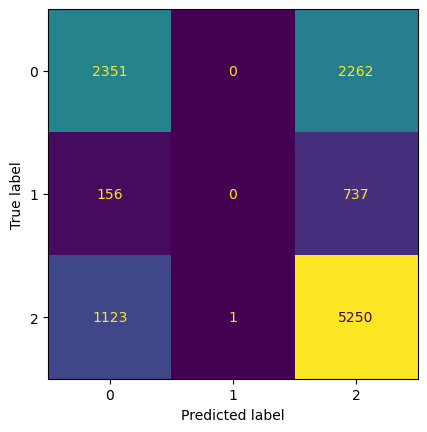

In [113]:
# model evaluation

#mse
mse = mean_squared_error(y_val, y_val_hat)
print('Mean Squared Error:', mse)

#rmse
rmse = mean_squared_error(y_val, y_val_hat, squared=False)
print('Root Mean Squared Error:', rmse)

#accuracy score
acc_score = accuracy_score(y_val, y_val_hat)
print('Accuracy score:', acc_score)

#precision score
pre_score = precision_score(y_val, y_val_hat, average="weighted")
print('Precision score:', pre_score)

#recall score
rec_score = recall_score(y_val, y_val_hat, average="weighted")
print('Recall score:', rec_score)

#plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(LR_model, X_val, y_val, colorbar=False);

##### 2. Random Forest Classifier

In [114]:
#Random Forest Classification function
#Hyperparameter tuning
def rf(k):
    model = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=k, random_state=0)
    return model

for k in range(1, 21):
    model = rf(k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    #evaluation
    print(f"max_depth: {k}")
    print(f"MSE: {mean_squared_error(y_val, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
    print('\n')
    
# The model performed the best at max_depth of 18.

max_depth: 1
MSE: 1.0502525252525252
Accuracy: 0.681060606060606


max_depth: 2
MSE: 1.0044612794612795
Accuracy: 0.6925084175084175


max_depth: 3
MSE: 0.9963804713804714
Accuracy: 0.6945286195286196


max_depth: 4
MSE: 0.9724747474747475
Accuracy: 0.7005050505050505


max_depth: 5
MSE: 0.9233164983164983
Accuracy: 0.7127946127946128


max_depth: 6
MSE: 0.8876262626262627
Accuracy: 0.7217171717171718


max_depth: 7
MSE: 0.8617003367003367
Accuracy: 0.7281986531986532


max_depth: 8
MSE: 0.8367845117845117
Accuracy: 0.7346801346801347


max_depth: 9
MSE: 0.8056397306397306
Accuracy: 0.7436026936026936


max_depth: 10
MSE: 0.7845959595959596
Accuracy: 0.7494949494949495


max_depth: 11
MSE: 0.7537037037037037
Accuracy: 0.7584175084175084


max_depth: 12
MSE: 0.7261784511784511
Accuracy: 0.765993265993266


max_depth: 13
MSE: 0.6903198653198653
Accuracy: 0.7765993265993266


max_depth: 14
MSE: 0.6667508417508418
Accuracy: 0.7824915824915825


max_depth: 15
MSE: 0.6495791245791246
Accurac

###### The random forest model performs best when the maximum depth is 18. 

In [115]:
#initiate the model
RF_model = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=18, random_state=0)

#fit the model
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, oob_score=True, random_state=0)

In [116]:
#make predictions
y_val_hat = RF_model.predict(X_val)
y_val_hat

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

Mean Squared Error: 0.6017676767676767
Root Mean Squared Error: 0.7757368605188726
Accuracy score: 0.7987373737373737
Precision score: 0.7967535259028428
Recall score: 0.7987373737373737


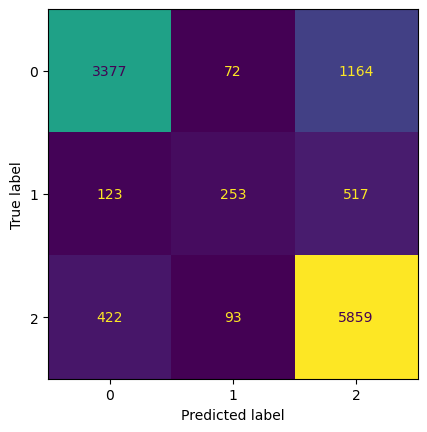

In [117]:
# model evaluation
#mse
mse = mean_squared_error(y_val, y_val_hat)
print('Mean Squared Error:', mse)

#rmse
rmse = mean_squared_error(y_val, y_val_hat, squared=False)
print('Root Mean Squared Error:', rmse)

#accuracy score
acc_score = accuracy_score(y_val, y_val_hat)
print('Accuracy score:', acc_score)

#precision score
pre_score = precision_score(y_val, y_val_hat, average="weighted")
print('Precision score:', pre_score)

#recall score
rec_score = recall_score(y_val, y_val_hat, average="weighted")
print('Recall score:', rec_score)

#plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(RF_model, X_val, y_val, colorbar=False);

##### 3. Gradient Boosting Model

In [118]:
#Gradient Boosting Trees Classification function
#Hyperparameter tuning
def rf(k):
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=k, random_state=0)
    return model

for k in range(1, 11):
    model = rf(k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    #evaluation
    print(f"Max_depth: {k}")
    print(f"MSE: {mean_squared_error(y_val, y_pred)}")
    print(f"Accuracy score: {accuracy_score(y_val, y_pred)}")
    print('\n')

Max_depth: 1
MSE: 0.862037037037037
Accuracy score: 0.7291245791245792


Max_depth: 2
MSE: 0.762962962962963
Accuracy score: 0.7564814814814815


Max_depth: 3
MSE: 0.7083333333333334
Accuracy score: 0.7707070707070707


Max_depth: 4
MSE: 0.6687710437710438
Accuracy score: 0.7774410774410775


Max_depth: 5
MSE: 0.6439393939393939
Accuracy score: 0.783080808080808


Max_depth: 6
MSE: 0.6494107744107744
Accuracy score: 0.7806397306397307


Max_depth: 7
MSE: 0.6566498316498316
Accuracy score: 0.7771885521885522


Max_depth: 8
MSE: 0.6819023569023569
Accuracy score: 0.7655723905723906


Max_depth: 9
MSE: 0.7090909090909091
Accuracy score: 0.7542929292929293


Max_depth: 10
MSE: 0.7742424242424243
Accuracy score: 0.7265151515151516




###### The GBT model performs best when the maximum depth is 5.

In [119]:
#instantiate the model
GBT_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0)

#fit model
GBT_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=5, random_state=0)

In [120]:
#make predictions
y_val_hat = GBT_model.predict(X_val)
y_val_hat

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

Mean Squared Error: 0.6439393939393939
Root Mean Squared Error: 0.8024583440524461
Accuracy score: 0.783080808080808
Precision score: 0.777233774232851
Recall score: 0.783080808080808


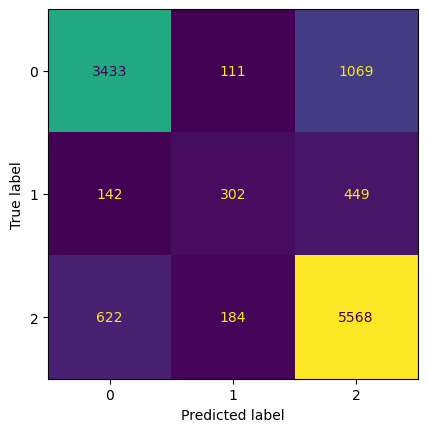

In [121]:
# model evaluation

#mse
mse = mean_squared_error(y_val, y_val_hat)
print('Mean Squared Error:', mse)

#rmse
rmse = mean_squared_error(y_val, y_val_hat, squared=False)
print('Root Mean Squared Error:', rmse)

#accuracy score
acc_score = accuracy_score(y_val, y_val_hat)
print('Accuracy score:', acc_score)

#precision score
pre_score = precision_score(y_val, y_val_hat, average="weighted")
print('Precision score:', pre_score)

#recall score
rec_score = recall_score(y_val, y_val_hat, average="weighted")
print('Recall score:', rec_score)

#plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(GBT_model, X_val, y_val, colorbar=False);

##### Model selection

The `Random Forest Classifier model` with a maximum depth of `18` is the best performing model.    
It has an accuracy score of 0.7987. This is an indication that the model is a good fit to the data and in predicting the water pumps functionality.

##### Predictions on the test set

In [122]:
# make predictions
y_predictions = RF_model.predict(X_test)

In [123]:
# have a look at the predicted values
y_predictions

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)